# Lending Club Case Study

**Problem Statement**

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### <span style= 'background:yellow'>Read Loan Dataset</span>

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset and check the header rows
loan = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\Lending Club Case Study\loan\loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the the dataframe
loan.shape
loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### <span style= 'background:yellow'> Data Handling and Cleaning</span>

During our initial analysis of the datasheet, we could identify the following inconsistencies which need to be corrected before we start our EDA. 
- Numerical Columns are having special characters 
- Columns having too many missing values
- Columns having constant values such as 0 , xxx , 999 etc.
- Fix incorrect data types

#### *Clean columns with missing/fixed values*

In [4]:
#Check the number of null values in the columns
loan.isnull().sum() 


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Check for columns with more than 50% missing values(NA). These columns have very less valid data available, hence they will not provide much insights.
loan = loan.loc[:, (loan.isna().sum() < (loan.shape[0]/2))]
# Re verify the dataset size
loan.shape

(39717, 54)

In [6]:
# Check for columns with more than 50% missing values(0)
loan = loan.loc[:, ((loan == 0).sum() <(loan.shape[0]/2))]
# Re verify the dataset size
loan.shape

(39717, 41)

In [7]:
#check rows with more than 50% NaN values
loan.isna().sum(axis=1).max()

## Rows have max 4 NaN values which is very less in number, hence ignorable

4

In [8]:
#check Duplicate data
loan.value_counts()

id       member_id  loan_amnt  funded_amnt  funded_amnt_inv  term        int_rate  installment  grade  sub_grade  emp_title               emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  pymnt_plan  url                                                               desc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [9]:
#Columns pymnt_plan,initial_list_status,policy_code,application_type has fixed value for all rows. We will not be able to find any predictive pattern from these data. 
# So, we will remove these columns from our final dataset.
loan.drop(['pymnt_plan','initial_list_status','policy_code','application_type'],axis=1,inplace=True)


In [10]:
# Re-verify dataset
loan.value_counts()

# Re-Count null values
loan.isnull().sum() 

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                   12942
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d  

We will now check the columns having null values. Since the null values will decrease accuracy of the analysis, we need to remove/replace the null values.

In [11]:
# Check desc column for missing values
loan.desc.value_counts()

# This column does not have any predictive pattern of values, hence we can not replace the missing values with any of the existing data
# Replace missing values with 'Not Available'
loan.desc.fillna('Not Available',inplace=True)

In [12]:
# Check emp title column for missing values
loan[loan['emp_title'].isna()]

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# Check emp title column for most common value
loan['emp_title'].mode()

# Replace missing values with most frequent value
loan['emp_title'].fillna(value=loan['emp_title'].mode().values[0],inplace=True)

# Re-Count null values
loan.isnull().sum() 
loan.shape


(39717, 37)

In [13]:
# Check employment length (emp_length) column for missing values
loan['emp_length'].isna().sum()

# Check values for column - emp_length
loan['emp_length'].value_counts()

# Column has numerical data type but contains string 'years','+','<'. 
# Remove the strings to make the column numeric.
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace('years','').replace('year','').replace('10+ ','11').replace('< 1 ','0.5'))
loan['emp_length'] = loan['emp_length'].astype(float)


# Verify the column
loan['emp_length'].value_counts()

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# Replacing NaN values with mean value will give minimal impact on the computations. 
loan['emp_length'].mean()
loan['emp_length'].fillna(value=round(loan['emp_length'].mean()),inplace=True)

# Re-Count null values
loan.isnull().sum() 

# Reset index
loan.reset_index


<bound method DataFrame.reset_index of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... revol_bal  \
0       36 months   10.65%       162.87     B 

In [14]:
# Check title column for missing values
loan[loan.title.isnull()]

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# This column is a categorization of the column purpose , we can use the same value to fill up missing values 
loan.loc[(loan['title'].isna()), 'title'] = loan[loan.title.isnull()].purpose.values

# Re-Count null value
loan.isna().sum()


id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d           71
last_pymnt_amnt         0
last_credit_pull_d      2
dtype: int64

In [15]:
# Check last_pymnt_d column for missing values
loan[loan.last_pymnt_d.isnull()]

# All of records with missing value for 'last_pymnt_d' belongs to loans with status as 'Charged off'. 
# Check most frequent value for last payment date when loan status is 'Charged off'
loan[loan['loan_status'] == 'Charged Off'].last_pymnt_d.mode()

# Replace missing values with most frequent value
loan.loc[(loan['last_pymnt_d'].isna()), 'last_pymnt_d'] = loan[loan['loan_status'] == 'Charged Off'].last_pymnt_d.mode().values[0]


# Re-Count null value
loan.isna().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d            0
last_pymnt_amnt         0
last_credit_pull_d      2
dtype: int64

#### *Fix columns with incorrect data types*

In [16]:
# Check values for column - term
loan['term'].value_counts()

# Column has numerical data type but contains the string 'months' 
# Remove the string 'months' to make the column numeric
loan['term'] = loan['term'].apply(lambda x: x.replace('months',''))

# Verify the column
loan['term'].value_counts()


term
 36     29096
 60     10621
Name: count, dtype: int64

In [17]:
# Check values for column - int_rate
loan['int_rate'].value_counts()

# Column has numerical data type but contains the string '%'. Also the data type should be 'float' instead of int.
# Remove the string '%' to make the column numeric and change the data type to 'float'.
loan['int_rate'] = loan['int_rate'].apply(lambda x: x.replace('%','')).astype(float)

# Verify the column
loan['int_rate'].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [18]:
# Check values for column - revol_util
loan['revol_util'].value_counts()

# Column has numerical data type but contains the string '%'. Also the data type should be 'float' instead of int.
# Remove the string '%' to make the column numeric and change the data type to 'float'.
loan['revol_util'] = loan['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)

# Verify the column
loan['revol_util'].value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [19]:
# Check the datatypes of all the columns
loan.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
url                     object
desc                    object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util             float64
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_re

In [20]:
# Check column term
loan.term.value_counts()

# term should be a numeric column(integer)
loan.term = loan.term.astype(int)

#### Extract Date Information

- Extract Day, Month and Year from dates into individual columns to have more granularity of the time dependency
- Drop the date column after extraction is complete

In [21]:
# Check column issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
loan['issue_d'].value_counts()
loan['earliest_cr_line'].value_counts()
loan['last_pymnt_d'].value_counts()
loan['last_credit_pull_d'].value_counts()

# The columns are having incorrect format. These should be date columns. 
# Reset the format for date.

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')

# Also we can extract the month and year for more granular analysis

loan['issue_day'] = pd.DatetimeIndex(loan['issue_d']).day
loan['issue_month'] = pd.DatetimeIndex(loan['issue_d']).month
loan['issue_year'] = pd.DatetimeIndex(loan['issue_d']).year

#Drop the original column
loan.drop('issue_d',axis=1,inplace=True)

In [22]:
# Also we can extract the month and year for more granular analysis

loan['earliest_cr_day'] = pd.DatetimeIndex(loan['earliest_cr_line']).day
loan['earliest_cr_month'] = pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_year'] = pd.DatetimeIndex(loan['earliest_cr_line']).year

#Drop the original column
loan.drop('earliest_cr_line',axis=1,inplace=True)

In [23]:
# Also we can extract the month and year for more granular analysis

loan['last_pymnt_day'] = pd.DatetimeIndex(loan['last_pymnt_d']).day
loan['last_pymnt_month'] = pd.DatetimeIndex(loan['last_pymnt_d']).month
loan['last_pymnt_year'] = pd.DatetimeIndex(loan['last_pymnt_d']).year

#Drop the original column
loan.drop('last_pymnt_d',axis=1,inplace=True)

In [24]:
# Also we can extract the month and year for more granular analysis

loan['last_credit_pull_day'] = pd.DatetimeIndex(loan['last_credit_pull_d']).day
loan['last_credit_pull_month'] = pd.DatetimeIndex(loan['last_credit_pull_d']).month
loan['last_credit_pull_year'] = pd.DatetimeIndex(loan['last_credit_pull_d']).year

#Drop the original column
loan.drop('last_credit_pull_d',axis=1,inplace=True)

In [25]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'issue_day',
       'issue_month', 'issue_year', 'earliest_cr_day', 'earliest_cr_month',
       'earliest_cr_year', 'last_pymnt_day', 'last_pymnt_month',
       'last_pymnt_year', 'last_credit_pull_day', 'last_credit_pull_month',
       'last_credit_pull_year'],
      dtype='object')

### <span style= 'background:yellow'>Univariate Analysis </span>


In Univariate Analysis, we will investigate some of the key attributes of the given dataset.

We have segregated the columns into two groups - <span style="color:blue">**Numerical column**</span> and <span style="color:blue">**Categorical Columns**</span> based on the columns' datatypes. 
Moreover, we have categorized the **numerical columns** into sub-groups based on the functional definitions.


**Numerical columns in our dataset** : 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'term', 'issue_day', 'issue_month', 'issue_year', 'earliest_cr_day',
       'earliest_cr_month', 'earliest_cr_year', 'last_pymnt_day',
       'last_pymnt_month', 'last_pymnt_year', 'last_credit_pull_day',
       'last_credit_pull_month', 'last_credit_pull_year'
       'last_pymnt_amnt'
       
**Categorical columns in our dataset** : 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'revol_util'

In [26]:
# Identify numerical columns
numerical_data = loan.loc[:,['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']]
# Check statistical information for numerical columns
numerical_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,5.255420,6.896893e+04,13.315130,0.869200,9.294408,13382.528086,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,2678.826162
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,3.767619,6.379377e+04,6.678594,1.070219,4.400282,15885.016641,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,4447.136012
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,6.000000,3703.000000,13.000000,5576.930000,5112.310000,4600.000000,662.180000,218.680000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.000000,5.900000e+04,13.400000,1.000000,9.000000,8850.000000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,546.140000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,1.000000,12.000000,17058.000000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000,3293.160000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,11.000000,6.000000e+06,29.990000,8.000000,44.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000


In [27]:
# At first lets check if the LCs given in the dataset are having any duplicity.
idCheck = loan.duplicated(subset=['member_id']).any()
print(idCheck)

# Conclusion : There is a one to one mapping between id and member_id

False


Since the number of numeric columns are too many, we have sub-grouped them into divisions based on their functional definition provided along with the dataset.

##### 1. Univariate Analysis on Bank Loan Details
For those columns which gives us information on the loans issued. 

<span style="color:Blue">
Columns: Loan Amount, Funded Amount, Funded Amount Invested, Interest Rate
</span>

Text(0, 0.5, 'Frequency')

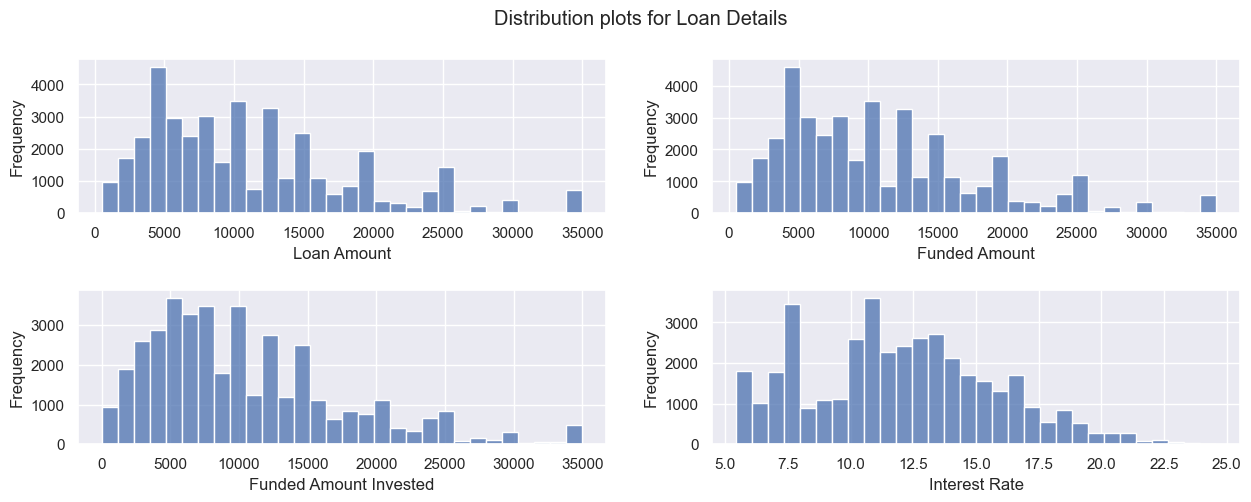

In [28]:
# Plot Loan related columns : 'loan_amnt',funded_amnt', 'funded_amnt_inv', 'int_rate'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.suptitle('Distribution plots for Loan Details')
fig.subplots_adjust(hspace=0.5)

# Plot 1: Frequency distribution of 'loan_amnt'
sns.histplot(loan['loan_amnt'], kde=False, ax=axs[0,0], bins=30)
axs[0,0].set_xlabel('Loan Amount')
axs[0,0].set_ylabel('Frequency')

# Plot 2: Frequency distribution of 'funded_amnt'
sns.histplot(loan['funded_amnt'], kde=False, ax=axs[0,1], bins=30)
axs[0,1].set_xlabel('Funded Amount')
axs[0,1].set_ylabel('Frequency')

# Plot 3: Frequency distribution of 'funded_amnt_inv'
sns.histplot(loan['funded_amnt_inv'], kde=False, ax=axs[1,0], bins=30)
axs[1,0].set_xlabel('Funded Amount Invested')
axs[1,0].set_ylabel('Frequency')

# Plot 4: Frequency distribution of 'int_rate'
sns.histplot(loan['int_rate'], kde=False, ax=axs[1,1], bins=30)
axs[1,1].set_xlabel('Interest Rate')
axs[1,1].set_ylabel('Frequency')

<span style="color:DarkBlue">
<b>Observations:</b>

- Loan Amount, Funded Amount and Funded Amount invested has very similar distribution pattern(ignoring the outliners)
- Most loaned and funded amount is around Rs 5000
- Loan Schemes of moderate interest rates are more popular, however there is a sudden peak at interest rate 7.5% which needs further investigation
- Loan Amount and interest rate should be analysed against 'Charged off' Loan types as they reflect meaningful patterns.
</span>

##### 2. Univariate Analysis on Customer's Financial Capacity

For those columns which gives us information on the LCs. 

<span style="color:Blue">
Columns: Installment, Employment Length, Annual Income, DTI
</span>

Text(0, 0.5, 'Frequency')

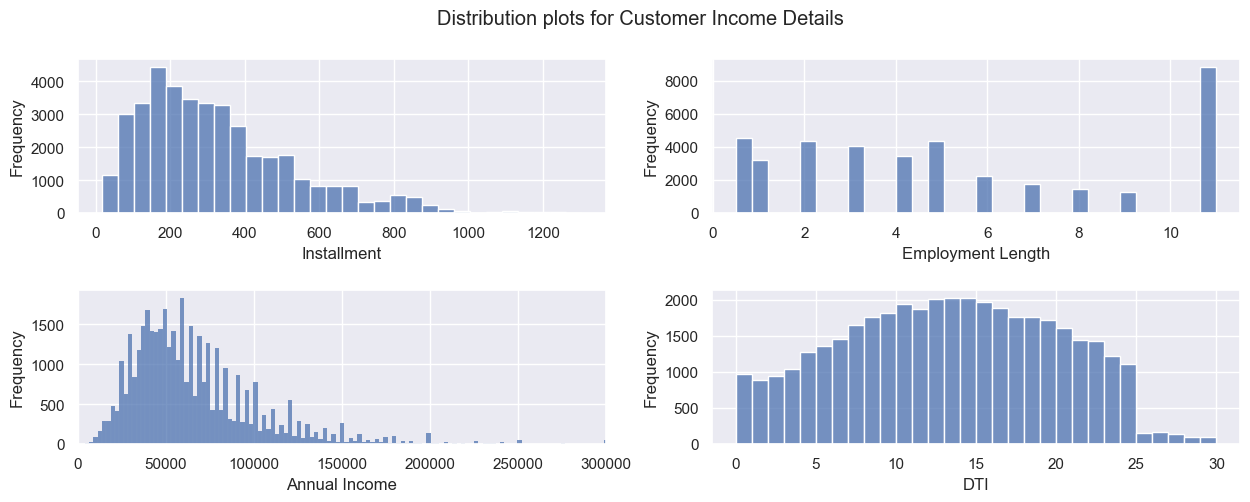

In [29]:
# Plot Customer related columns : 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.suptitle('Distribution plots for Customer Income Details')
fig.subplots_adjust(hspace=0.5)

# Plot 1: Frequency distribution of 'installment'
sns.histplot(loan['installment'], kde=False, ax=axs[0,0], bins=30)
axs[0,0].set_xlabel('Installment')
axs[0,0].set_ylabel('Frequency')

# Plot 2: Frequency distribution of 'emp_length'
sns.histplot(loan['emp_length'], kde=False, ax=axs[0,1], bins=30)
axs[0,1].set_xlabel('Employment Length')
axs[0,1].set_ylabel('Frequency')

# Plot 3: Frequency distribution of 'annual_inc'
sns.histplot(loan['annual_inc'], kde=False, ax=axs[1,0])
axs[1,0].set_xlim(0,300000)
axs[1,0].set_xlabel('Annual Income')
axs[1,0].set_ylabel('Frequency')

# Plot 4: Frequency distribution of 'DTI'
sns.histplot(loan['dti'], kde=False, ax=axs[1,1], bins=30)
axs[1,1].set_xlabel('DTI')
axs[1,1].set_ylabel('Frequency')


<span style="color:DarkBlue">

<b>Observations:</b>
- Outliners should be eliminated.
- Installments of lower amount is more in count.
- Customers with employment length > 10 years is more in number , their annual income is approximately 50K.
- Loan Schemes of moderate interest rates are more popular.
- Most of the customers have higher DTI which can be a risk factor. This should be further investigated.
- These columns have their individual insights, but can have co-relations amongst each other as well. This should be investigated in the bivariate analysis.

</span>

##### 3. Univariate Analysis on Payment Status

For those columns which gives us information on the LCs' Credit Summary & Loan Repayments. 

<span style="color:Blue">
Columns: Open Account Numbers, Revolving balance, Total Accounts, Total Payments, Total Payments Invested, Total Recovered Principal, Total Recovered Interest , Last Payment Amount and Revolving Utilization
</span>

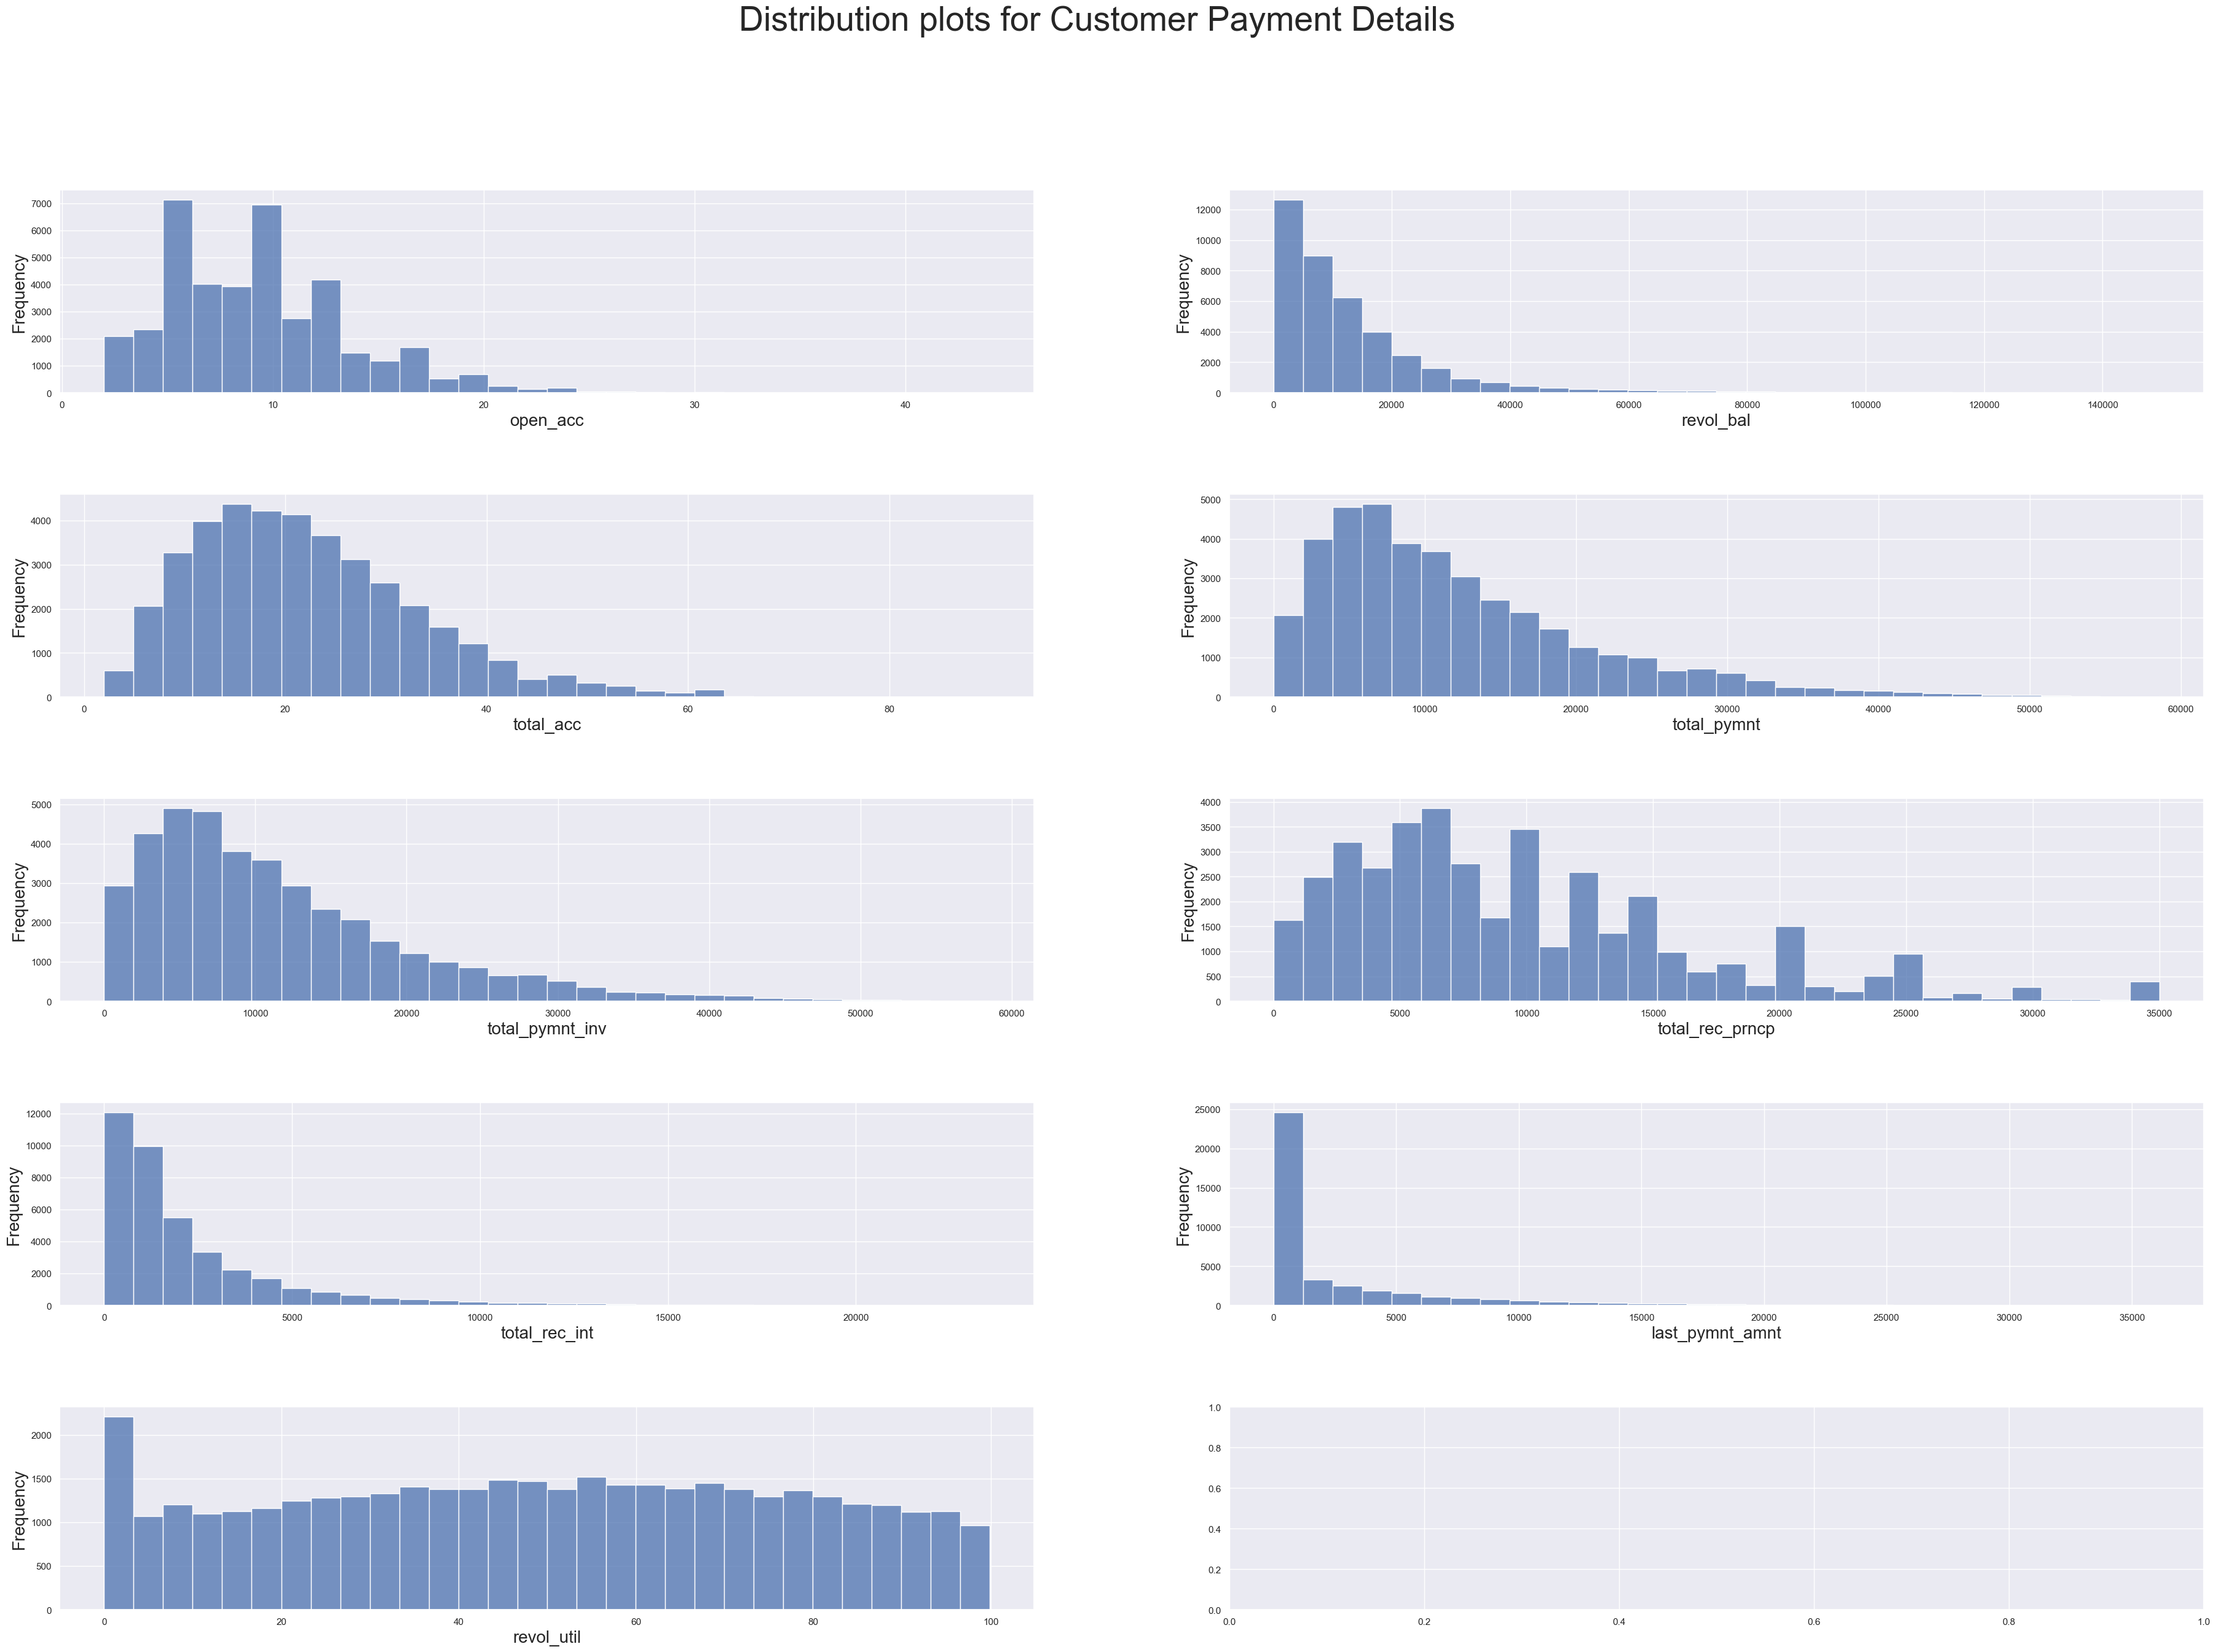

In [30]:

Payment_Analysis=['open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt' ,'revol_util']
# Plot Customer Payment related columns : 
fig, axs = plt.subplots(nrows=int((len(Payment_Analysis))/2)+1, ncols=2, figsize=(45, 30))
fig.suptitle('Distribution plots for Customer Payment Details',fontsize = 40)
fig.subplots_adjust(hspace=0.5)
x=0
y=0

for i in Payment_Analysis:
    sns.histplot(loan[i], kde=False, ax=axs[x,y], bins=30)
    axs[x,y].set_xlabel(i,fontsize=20)
    axs[x,y].set_ylabel('Frequency',fontsize=20)
    if y == 0:
        y=1
    else:
        y=0
        x+=1

<span style="color:DarkBlue">

<b>Observations:</b>
- Total payment and total payment invested shows similar data distribution.
- Average number of open accounts for customers is 9. We need to check the number of open accounts for defaulters.
- Revolving Line Utilization and revolving balance peaks at lower value, which is good. For higher values the distribution is uniformly spread.
- Total recovered principal shows similar trend with loan amount, with peaks at 5000, 10000, 15000 and so on. Co-relation between these columns need to be verified. 
    
</span>

##### 4. Analysis of Time Dependencies

Here we have done our analysis for all the time series fields.


In [31]:
loan.loc[:,['issue_day', 'issue_month', 'issue_year', 'earliest_cr_day',
       'earliest_cr_month', 'earliest_cr_year', 'last_pymnt_day',
       'last_pymnt_month', 'last_pymnt_year', 'last_credit_pull_day',
       'last_credit_pull_month', 'last_credit_pull_year']].describe()

,issue_day,issue_month,issue_year,earliest_cr_day,earliest_cr_month,earliest_cr_year,last_pymnt_day,last_pymnt_month,last_pymnt_year,last_credit_pull_day,last_credit_pull_month,last_credit_pull_year
count,39717.0,39717.000000,39717.000000,39717.0,39717.000000,39717.000000,39717.0,39717.000000,39717.000000,39715.0,39715.000000,39715.000000
mean,1.0,7.172168,2010.328902,1.0,6.890525,1996.787597,1.0,6.450563,2012.819498,1.0,5.818305,2014.285006
std,0.0,3.396910,0.877514,0.0,3.540473,7.405085,0.0,3.429601,1.538892,0.0,3.027076,1.791542
min,1.0,1.000000,2007.000000,1.0,1.000000,1969.000000,1.0,1.000000,2008.000000,1.0,1.000000,2007.000000
25%,1.0,4.000000,2010.000000,1.0,4.000000,1993.000000,1.0,3.000000,2012.000000,1.0,4.000000,2013.000000
50%,1.0,7.000000,2011.000000,1.0,7.000000,1998.000000,1.0,6.000000,2013.000000,1.0,5.000000,2015.000000
75%,1.0,10.000000,2011.000000,1.0,10.000000,2001.000000,1.0,9.000000,2014.000000,1.0,8.000000,2016.000000
max,1.0,12.000000,2011.000000,1.0,12.000000,2068.000000,1.0,12.000000,2016.000000,1.0,12.000000,2016.000000


- All columns for days(issue_day, last_credit_pull_day etc.) has the same value 1 for all the rows. Hence we can rule out these columns from our analysis.
- Earliest Credit lines hold very old values while most of the loans are issued since 2007. Therefore Earliest Credit Lines is less likely to give useful insights.

In [32]:
loan = loan.drop(['issue_day','earliest_cr_day','last_pymnt_day','last_credit_pull_day'],axis=1)

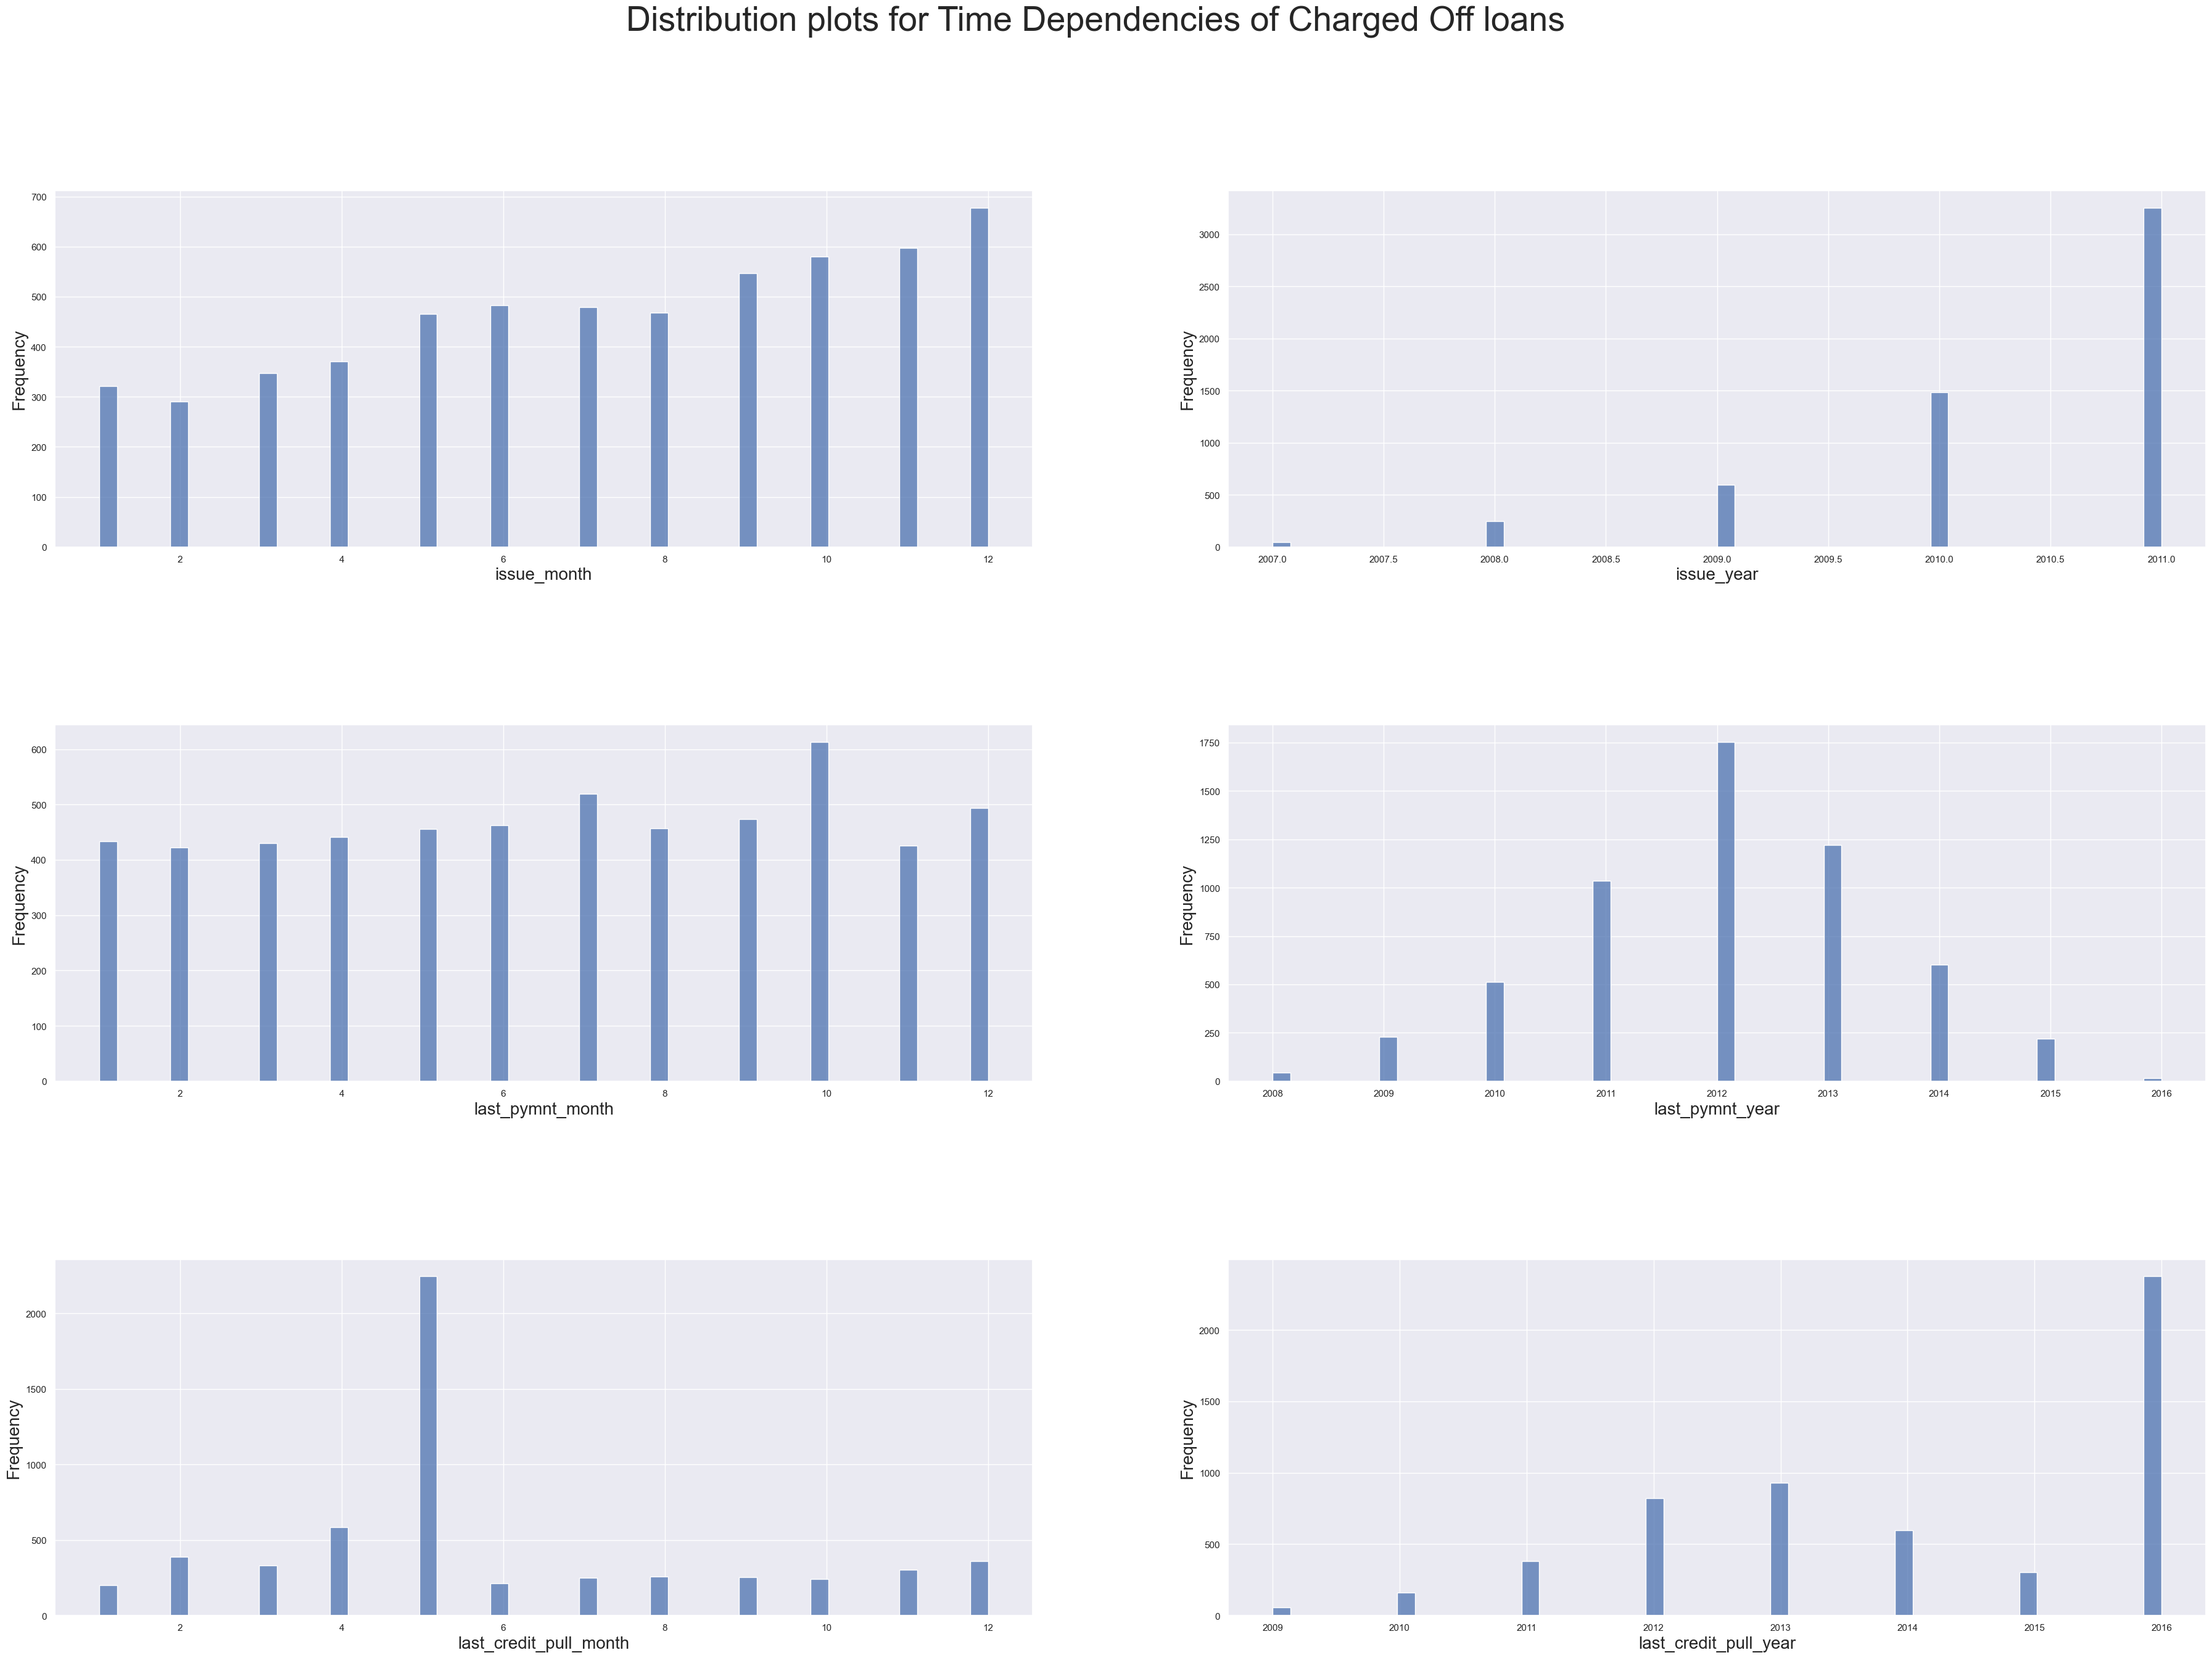

In [33]:
# Checking remaining date columns
date_Analysis=['issue_month', 'issue_year', 'last_pymnt_month', 'last_pymnt_year', 
                'last_credit_pull_month', 'last_credit_pull_year']
loan_upd = loan[loan['loan_status'] == 'Charged Off']
# Plot Time Distribution of charged off Loans : 
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(45, 30))
fig.suptitle('Distribution plots for Time Dependencies of Charged Off loans',fontsize = 40)
fig.subplots_adjust(hspace=0.5)
x=0
y=0

for i in date_Analysis:
    sns.histplot(loan_upd[i], kde=False, ax=axs[x,y], bins=50)
    axs[x,y].set_xlabel(i,fontsize=20)
    axs[x,y].set_ylabel('Frequency',fontsize=20)
    if y == 0:
        y=1
    else:
        y=0
        x+=1

<span style="color:DarkBlue">

<b>Observations:</b>
- The number of Charged Off Loans has been increasing every year considerably. It is evident that identification of risky applicants is not being done currently.
- For most of the Charged Off loans, payments were not received after 2012.
- Credit pull records are more in recent years probably because the repayment rate has lowered down.
    
</span>

##### Analysis on Categorical Variables

For all the non-numerical columns which can give us more information:

<span style="color:Blue">
Columns : 'grade', 'sub_grade', 'emp_title', 'home_ownership','verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title','zip_ode', 'addr_state', 'revol_util'
</span>

In [34]:
# Identify cateorical data
categorical_data = loan.loc[:,['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state']]
# Check statistical information for numerical columns
categorical_data.describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717
unique,7,35,28820,5,3,3,39717,26527,14,19616,823,50
top,B,B3,US Army,RENT,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Not Available,debt_consolidation,Debt Consolidation,100xx,CA
freq,12020,2917,2593,18899,16921,32950,1,12942,18641,2184,597,7099


<span style="color:DarkBlue">

<b>Observations:</b>

- Columns URL, emp_title, desc has almost all values unique, which means it is less likely to have any predictive pattern.
 So we will rule out these columns from our univariate analysis.
 - title can be considered as super-category for purpose, and it has more unique values. To understand the pattern with more granularity, we will consider 'purpose' for our study.
 - Sub_grade is a sub-category of grade. The observation for both the columns should be directly proportional to each other. So we will investigate on grade and focus on the subcategory of only the grades where number of defaulted loans are max or min.
 - Similarly zip_code and addr_state both gives same geographical insights, hence we are only considering 'addr_state' for our analysis.
    
</span>

We will now plot the categorical columns(univariate analysis) and also check how the data is differentiating based on loan status at the same time. Understanding the shift of the data will help us to identify key-factors for our multivariate analysis.

<Axes: xlabel='grade', ylabel='count'>

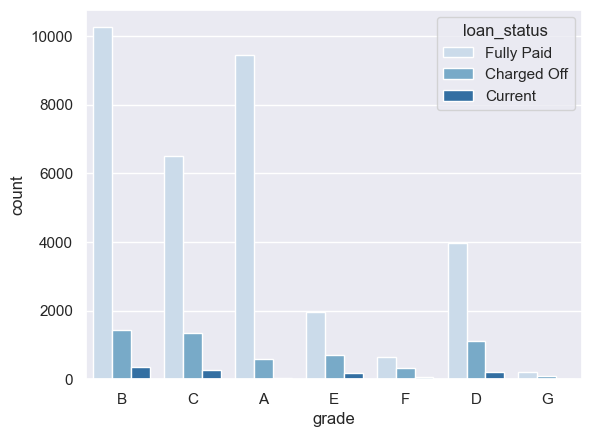

In [35]:
# Plot Categorical columns : 

# Plot 1: Category distribution of 'grade'
sns.countplot(x = 'grade', data = loan, hue='loan_status', palette = "Blues")

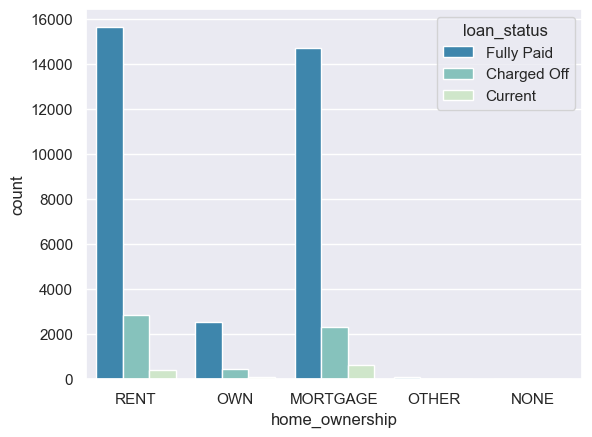

In [36]:
# Plot 2: Cateory distribution of 'home_ownership'
sns.countplot(x = 'home_ownership', data = loan,hue='loan_status', palette = "GnBu_r");

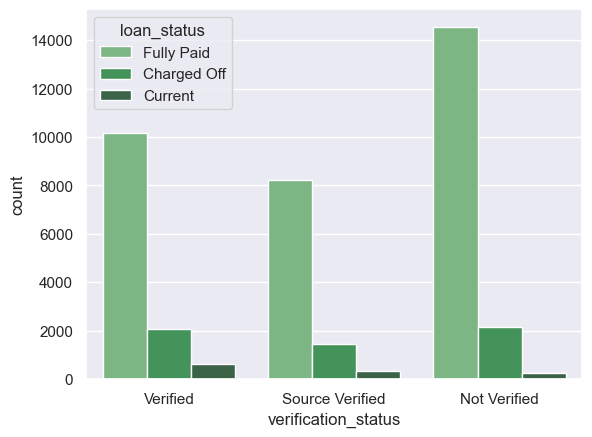

In [37]:
# Plot 3: Cateory distribution of 'verification_status'
sns.countplot(x = 'verification_status', data = loan,hue='loan_status', palette = "Greens_d");

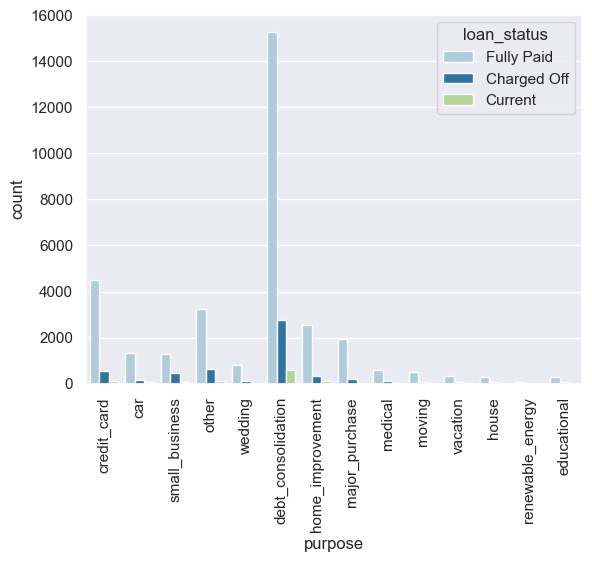

In [38]:
# Plot 4: Cateory distribution of 'purpose'
sns.countplot(x = 'purpose', data = loan,hue='loan_status',palette = "Paired");
plt.xticks(rotation=90)
plt.show()

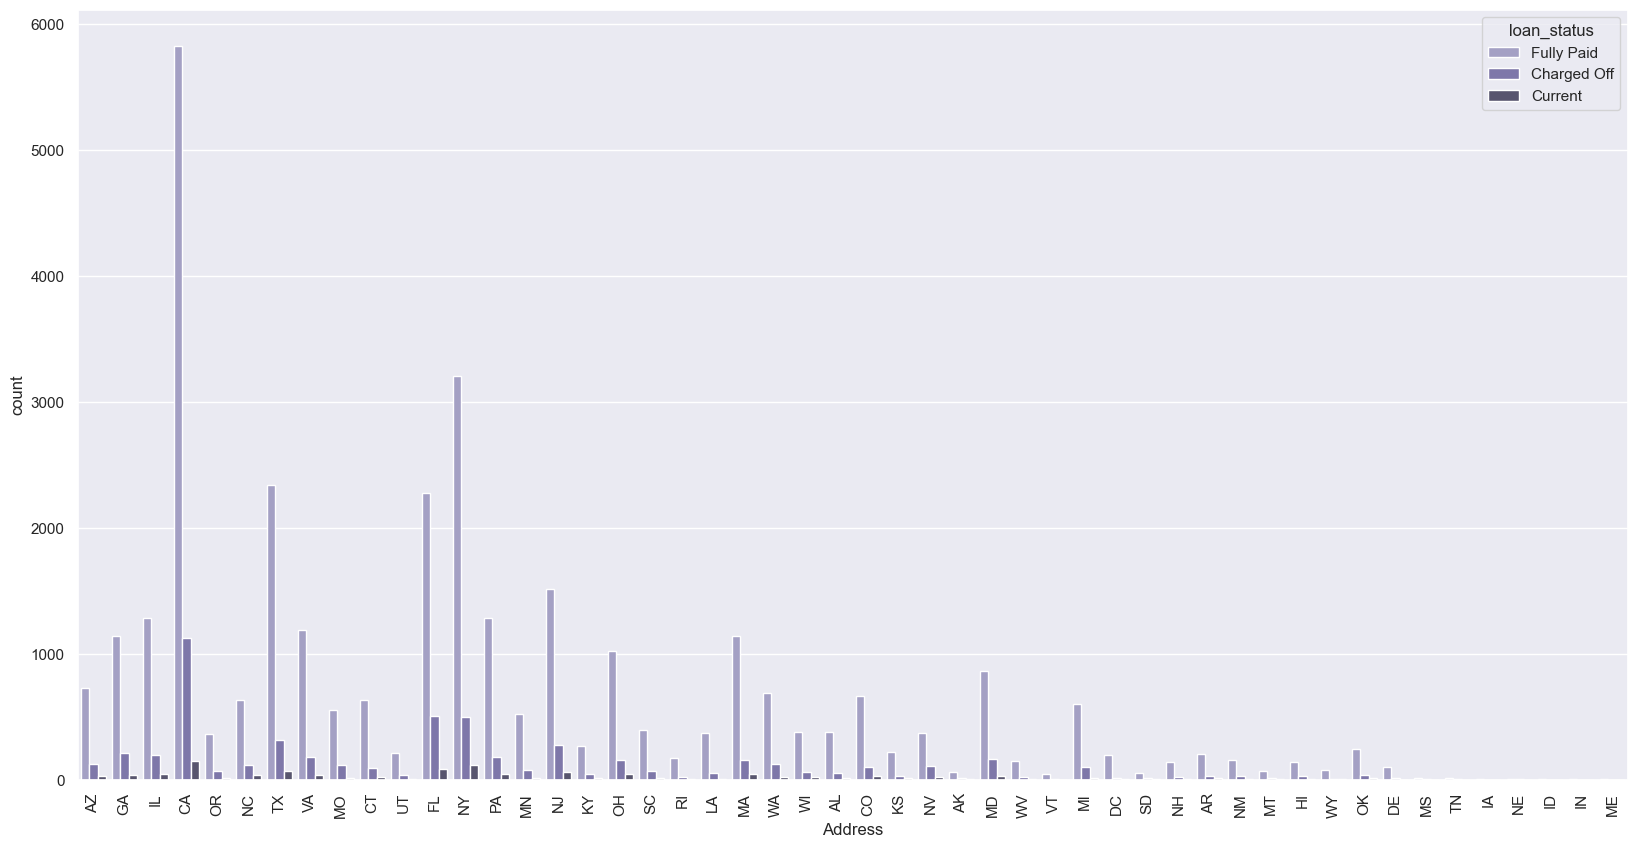

In [39]:
# Plot 5: Cateory distribution of 'addr_state'
sns.countplot(x = 'addr_state',data = loan, hue='loan_status', palette = "Purples_d")
plt.xticks(rotation=90)
plt.xlabel('Address')
plt.gcf().set_size_inches(20,10)
plt.show()

<span style="color:DarkBlue">

<b>Observations:</b>
- Number of loans defaulted is very less for housing loan customers who own the house. But the number of applicants owning the house is very less, not providing much insights.
- Majority of the loans were taken for debt_consolidation, which means, loans were approved for customers already having other financial debts. This can be one of the major factors for defaulting the loan.
- Verification status shows similar pattern for all types of customers, so it is not very helpful for any conclution.
- Canada has the highest number of customer base, hence number of defaulters are also higher in Canada.
- NY also has comparatively higher number of defaulters.
</span>

#### Bivariate & Multivariate Analysis

During our univariate analysis, we have observed the following co-relations between certain attributes. We will now investigate them in more details as a part of our analysis. We have considered the loans with loan status as <b>'Charged off'</b> as our category for defaulted loan.

- Interest Rate and Loan Amount varying with loan status.
- Co-relation between Annual income, Employment Length, Installments and DTI.
- Loan Grade and corresponding sub-grades changing with loan status. 
- Impact of debt-consolidation(purpose) on the defaulted loans.
- Average number of open accounts for defaulting LCs - is it higher than 9?
- Co-relation between recovered amounts and the loan amount over time.
- Co-relation between annual income and the DTI.
- Time distribution of purpose of loans applied and loans defaulted

Text(0, 0.5, 'Amount')

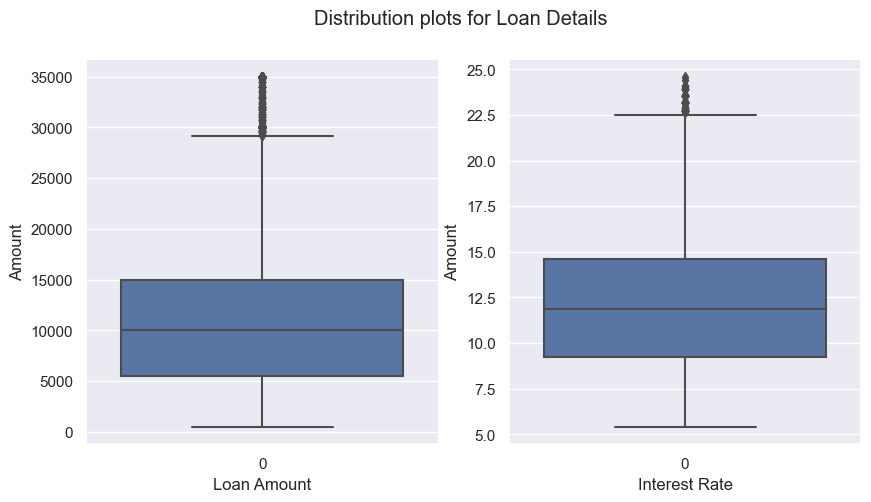

In [40]:
# Check how interest rate and loaned amount varies with the loan status.
# Plot Loan related columns :
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Distribution plots for Loan Details')
fig.subplots_adjust(hspace=1)

# Plot 1: Frequency distribution of 'loan_amnt'
sns.boxplot(loan['loan_amnt'], ax=axs[0])
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Amount')

# Plot 2: Frequency distribution of 'int_rate'
sns.boxplot(loan['int_rate'], ax=axs[1])
axs[1].set_xlabel('Interest Rate')
axs[1].set_ylabel('Amount')

Text(0, 0.5, 'Rate of Interest')

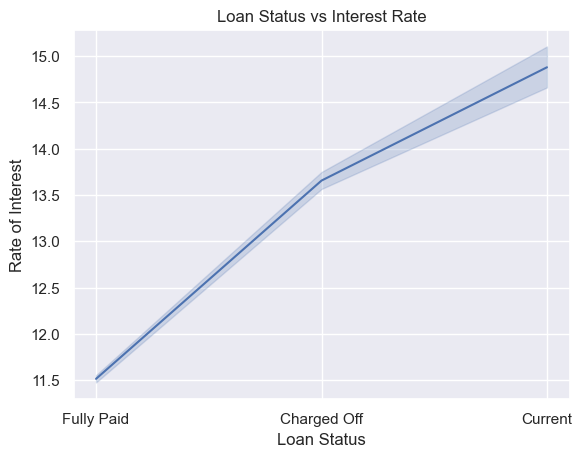

In [41]:

# From our boxplots we can identify the outliners which need to be eliminated from the analysis.
loan_upd = loan[(loan.int_rate<24) & (loan.loan_amnt<30000)]

# Check interest rate for each loan status
sns.lineplot(x = 'loan_status', y = 'int_rate', data = loan_upd)
plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Rate of Interest')

Text(0, 0.5, 'Loaned Amount')

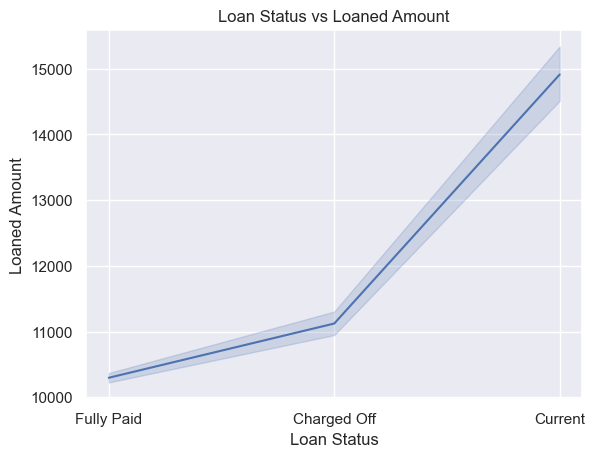

In [42]:
# Check loaned amount for each loan status
sns.lineplot(x = 'loan_status', y = 'loan_amnt', data = loan_upd)
plt.title('Loan Status vs Loaned Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loaned Amount')

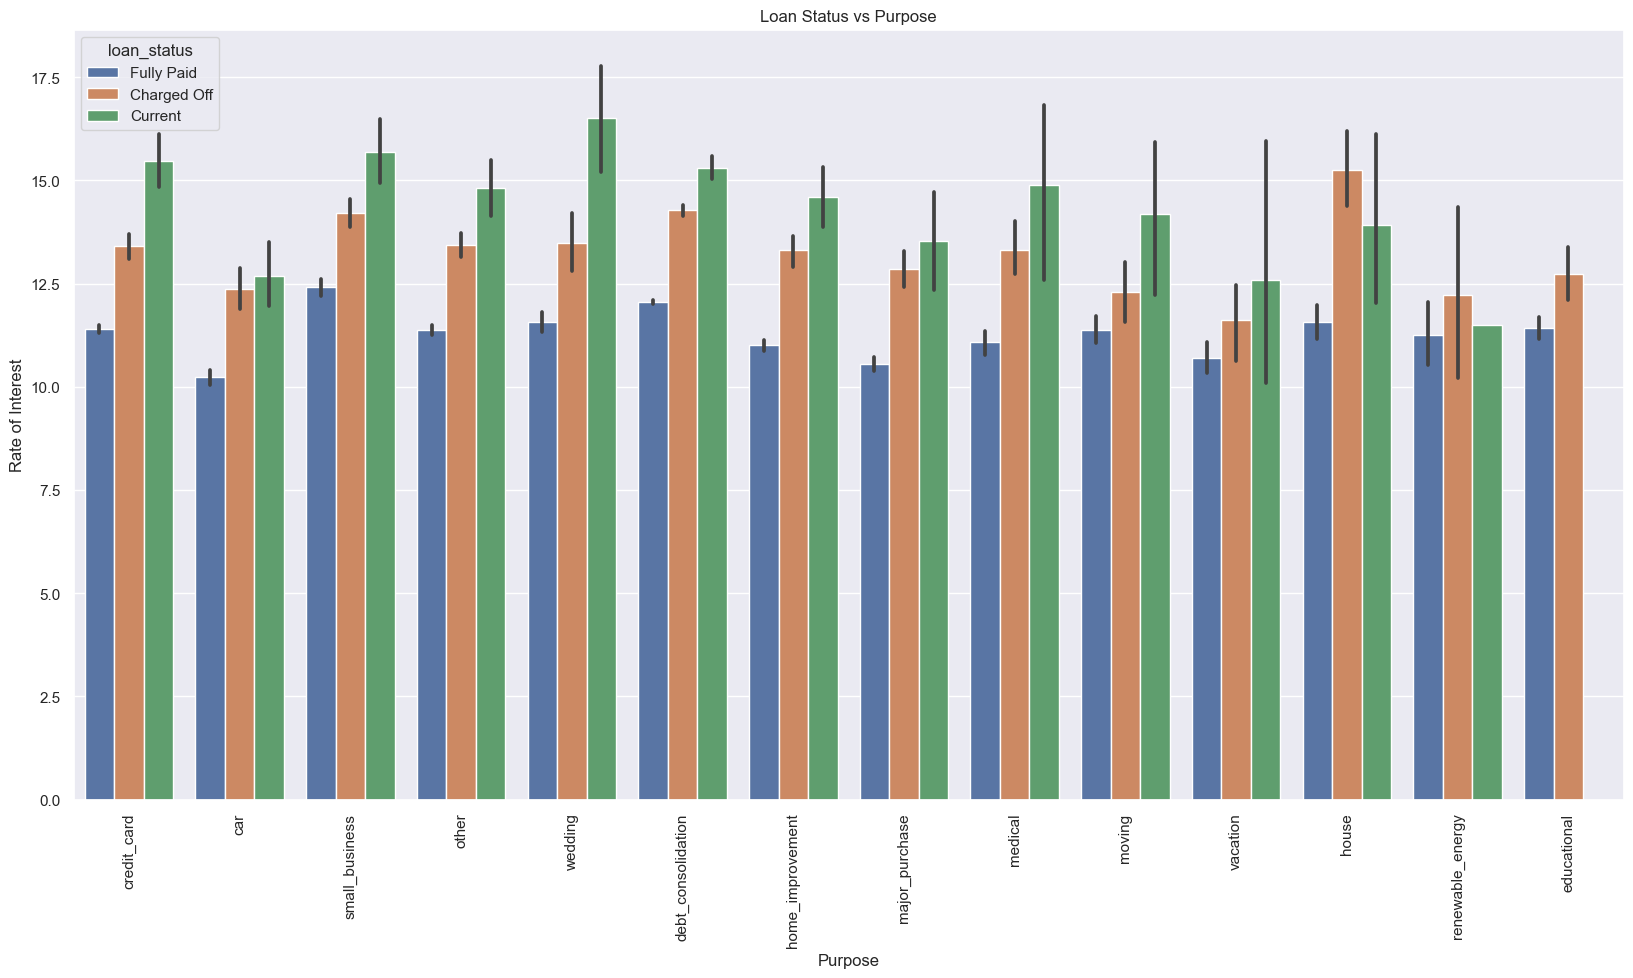

In [43]:
# Check if interest rate is impacting loan status and purpose
sns.barplot(x='purpose', y='int_rate', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,10)
plt.title('Loan Status vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('Rate of Interest')
plt.show()

<span style="color:DarkBlue">

<b>Observations:</b>
- Loans with lower interest rates are paid off but loans with interest rate higher than 13.5% are more charged off. 
- Loan amount has similar pattern for both fully paid loans as well as charged off loans.
- Small BUsiness, House and Debt consolidation requires attention as the outliers can be seen extended till 22.5%.
- Renewable energy has good repayment rate but the number of current loans approved is very less.
</span>

Text(0, 0.5, 'Ratio')

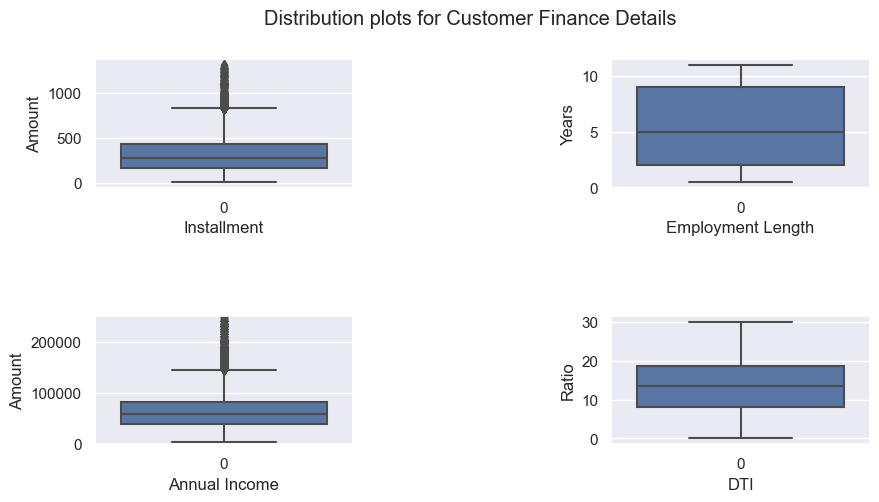

In [44]:
# Co-relation between Annual income, Employment Length, Installments and DTI.

# Plot Customer related columns to identify outliners:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.suptitle('Distribution plots for Customer Finance Details')
fig.subplots_adjust(hspace=1,wspace=1)

# Plot 1: Frequency distribution of 'Installment'
sns.boxplot(loan['installment'], ax=axs[0,0])
axs[0,0].set_xlabel('Installment')
axs[0,0].set_ylabel('Amount')

# Plot 2: Frequency distribution of 'emp_length'
sns.boxplot(loan['emp_length'], ax=axs[0,1])
axs[0,1].set_xlabel('Employment Length')
axs[0,1].set_ylabel('Years')

# Plot 3: Frequency distribution of 'annual_inc'
sns.boxplot(loan['annual_inc'], ax=axs[1,0])
axs[1,0].set_ylim(0,0.25*10**6)
axs[1,0].set_xlabel('Annual Income')
axs[1,0].set_ylabel('Amount')


# Plot 4: Frequency distribution of 'dti'
sns.boxplot(loan['dti'], ax=axs[1,1])
axs[1,1].set_xlabel('DTI')
axs[1,1].set_ylabel('Ratio')


Text(0, 0.5, 'Debt-to-Income')

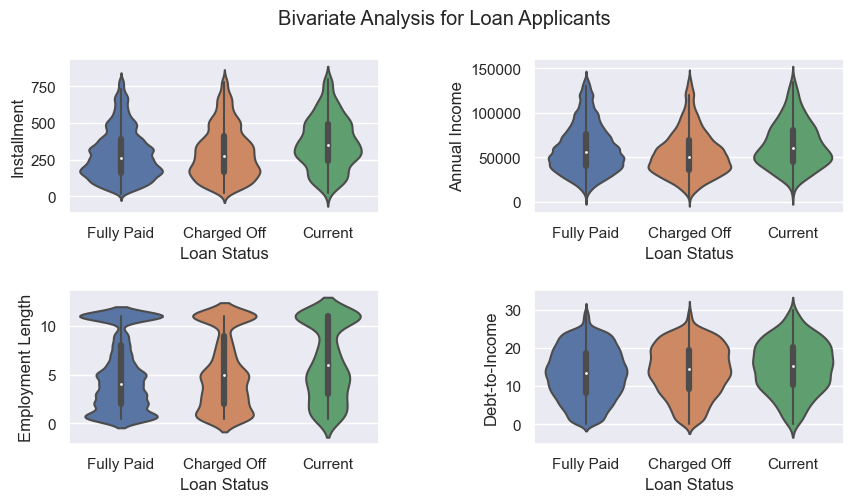

In [45]:
# Eliminate outliners : 

loan_upd = loan[(loan.installment<800) & (loan.annual_inc<140000)].loc[:,['installment','annual_inc','emp_length','dti','loan_status']]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.suptitle('Bivariate Analysis for Loan Applicants')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot 1: 'Loan Status' vs 'Installment'
sns.violinplot(loan_upd, x='loan_status',y='installment',ax=axs[0,0])
axs[0,0].set_xlabel('Loan Status')
axs[0,0].set_ylabel('Installment')

# Plot 2: 'Loan Status' vs 'Annual Income'
sns.violinplot(loan_upd, x='loan_status',y='annual_inc',ax=axs[0,1])
axs[0,1].set_xlabel('Loan Status')
axs[0,1].set_ylabel('Annual Income')

# Plot 3: 'Loan Status' vs 'Employee Length'
sns.violinplot(loan_upd, x='loan_status',y='emp_length',ax=axs[1,0])
axs[1,0].set_xlabel('Loan Status')
axs[1,0].set_ylabel('Employment Length')

# Plot 4: 'Loan Status' vs 'DTI'
sns.violinplot(loan_upd, x='loan_status',y='dti',ax=axs[1,1])
axs[1,1].set_xlabel('Loan Status')
axs[1,1].set_ylabel('Debt-to-Income')


<span style="color:DarkBlue">

<b>Observations:</b>
- Bivariate Analysis for the customer related fields does not have useful insights.
</span>

Text(0, 0.5, 'Count of Loan Sub Grades')

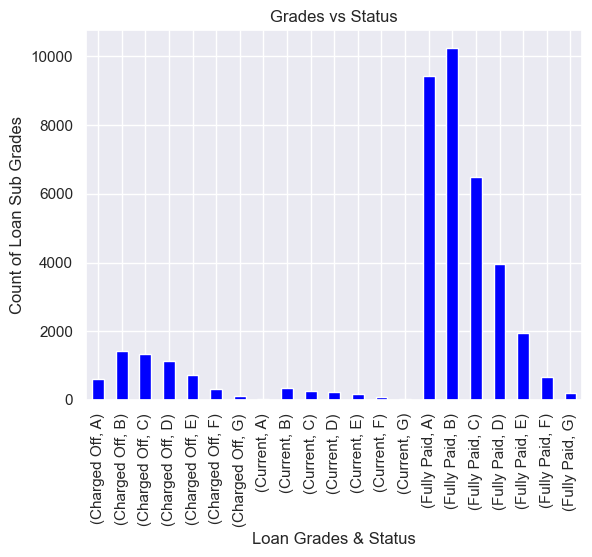

In [46]:
# Check loan grade and sub-grade vs loan status

loan_upd = loan.groupby(['loan_status','grade'])['sub_grade'].count().plot.bar(color='blue')
plt.title('Grades vs Status')
plt.xlabel('Loan Grades & Status')
plt.ylabel('Count of Loan Sub Grades')

<span style="color:DarkBlue">

<b>Observations:</b>
- Grade B has highest number of defaulters but the number of loan applications are more for grade B.
- Chances of loan default is more for Subgrades of C and D although the number of applications are not very high
- Subgrades of A have very good repayment rate.
</span>

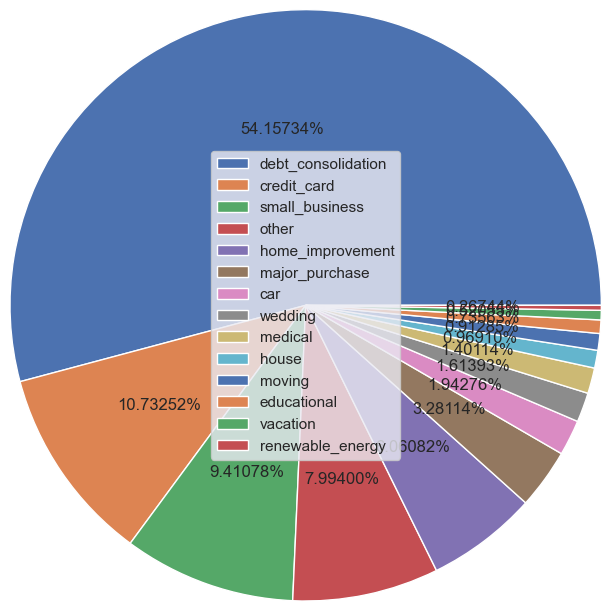

In [47]:
# Check what charged-off amount is for debt-consolidation(purpose)
# Exclude the outliners
loan_upd = loan[(loan['loan_status'] == 'Charged Off') & (loan.loan_amnt<30000)].groupby(['purpose'])['loan_amnt'].sum()
loan_upd = loan_upd.sort_values(ascending=False)
labels = loan_upd.index.to_list()
patches, size, pctg = plt.pie(loan_upd,autopct='%0.5f%%',radius=2)
plt.legend(patches, labels, loc="center")
plt.show()

<span style="color:DarkBlue">

<b>Observations:</b>
- 54% of the total charged off loans are for debt consolidation. This should be a concerning factor for the organization.
- For renewable energy the total charged off loans is only 0.27%. The organization should invest more on renewable energy.
</span>

Text(0, 0.5, 'Number of Open Accounts')

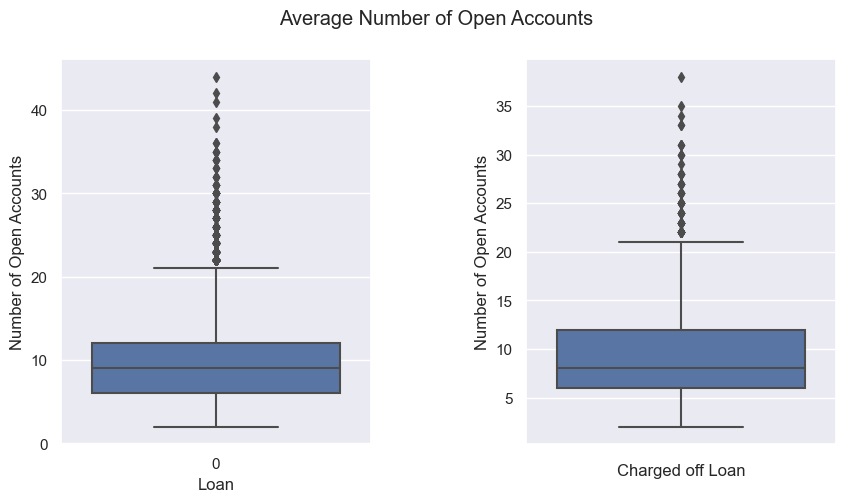

In [48]:
# Average number of open accounts for defaulting LCs - is it higher than 9?
# Check outliners for open accounts.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Average Number of Open Accounts')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot 1: All loans 
sns.boxplot(loan.open_acc,ax=axs[0])
axs[0].set_xlabel('Loan')
axs[0].set_ylabel('Number of Open Accounts')

# Plot 2: Charged Off Loans
sns.boxplot(data=loan[loan['loan_status'] == 'Charged Off'],y='open_acc',ax=axs[1])
axs[1].set_xlabel('Charged off Loan')
axs[1].set_ylabel('Number of Open Accounts')

<span style="color:DarkBlue">

<b>Observations:</b>
- There is not much shift in mean. So average number of open accounts can not predict risks for defaulting loans.
    
</span>

,loan_amnt,total_rec_prncp,total_rec_int,int_rate
loan_amnt,1.000000,0.852021,0.729726,0.309415
total_rec_prncp,0.852021,1.000000,0.684027,0.186882
total_rec_int,0.729726,0.684027,1.000000,0.529913
int_rate,0.309415,0.186882,0.529913,1.000000


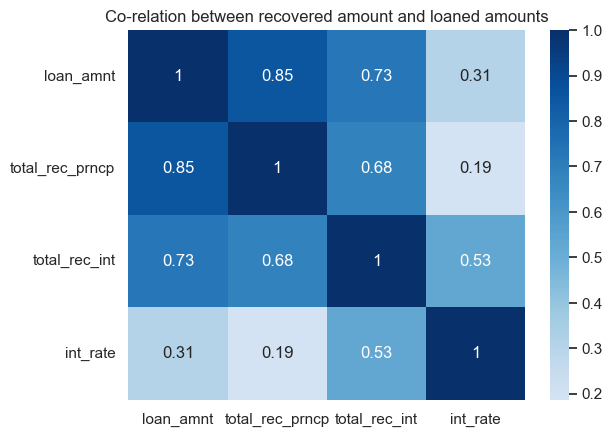

In [49]:
# Co-relation between recovered amounts and the loan amount over time.

loan_corr = loan.loc[:,['loan_amnt','total_rec_prncp', 'total_rec_int','int_rate']].corr()
sns.heatmap(loan_corr, annot=True, center=0.5,cmap='Blues')
plt.title('Co-relation between recovered amount and loaned amounts')
loan_corr

<span style="color:DarkBlue">

<b>Observations:</b>
- Higher the interest rate, lower is the amount loaned which seems to be an obvious fact.
- With increasing interest rate the rate of recovery is lowering down supporting our previous findings.
</span>

annual_inc_bucket      VL      L      M      H      VH
loan_status                                           
Charged Off        14.000  15.03  15.06  14.66  13.115
Current            15.515  15.53  17.04  15.44  13.500
Fully Paid         13.750  14.21  13.91  13.39  11.890


<Axes: title={'center': 'Co-relation between Annual Income and DTI'}, xlabel='annual_inc_bucket', ylabel='loan_status'>

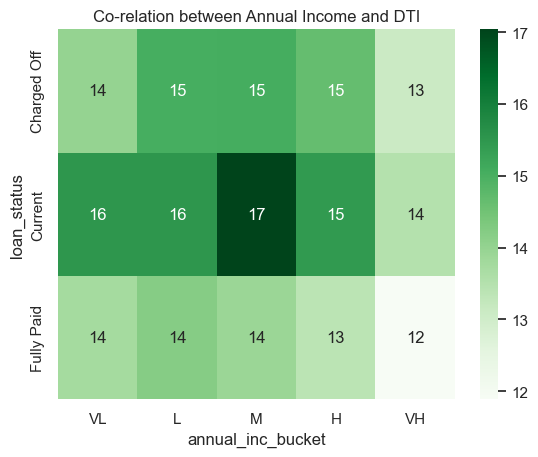

In [51]:
# Co-relation between annual income and the DTI.

# Remove Outliners identified from our boxplots. 
loan4HM=loan[(loan['annual_inc'] <= 150000) & (loan['annual_inc'] >= 4000)]
loan4HM=loan4HM[(loan4HM['dti'] >= 0) & (loan4HM['dti'] <= 30)]
plt.title('Co-relation between Annual Income and DTI')
# Though bucketized annual income, DTI was taken for rating
loan4HM['annual_inc_bucket']=pd.qcut(loan4HM.annual_inc,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
loan4HM['dti_bucket']=pd.qcut(loan4HM.dti,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
res=pd.pivot_table(data=loan4HM,index='loan_status',columns='annual_inc_bucket',values='dti',aggfunc=np.median)
print(res)
sns.heatmap(res,cmap='Greens',annot=True)

<span style="color:DarkBlue">

<b>Observations:</b>
- Current loans need immediate attention to remediate risk of loan defaults.
- Users under Block 16, i.e users with Low Income and High Debt ratio is second highest risk are more prone to default loans as   well.
- Users with High Income have medium to low DTI.
- Block 15 with users having low to high income but Medium DTI needs shows risk of defaulting loans.

In [ ]:
# Check time distribution of purpose of loans applied and loans defaulted
ax=sns.countplot(x = 'issue_year', data = loan, hue='purpose',palette = "GnBu_r");
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Time distribution of purpose of loans applied')
plt.xlabel('Year')
plt.gcf().set_size_inches(15,8)
plt.show()

ax=sns.countplot(x = 'issue_year', data = loan, hue='loan_status',palette = "GnBu_r");
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.title('Time distribution of purpose of loans defaulted')
plt.gcf().set_size_inches(15,8)
plt.show()

<span style="color:DarkBlue">

<b>Observations:</b>
- Debt consolidation and credit card purpose seems to increase gradually as months passby where rest remains almost same..
- Loans issues on debt consolidation almost doubles by end of year, where as credit card loans increases by 3x.
</span>

# <span style= 'background:yellow'>Conclusion: </span>

<span style="color:Red">
From all the above findings we could come to the following set of information that can help during Loan Approval Decisions.
    
- Loans approved should have lower interest Rate. Amounts loaned at higher interest rates(typically more than 13.5%) are mostly charged-off.
    
- Amounts for loan subgrades of A should be favored over sub-grades for B, C & D to reduce charged-offs rates.
    
- Investments on Renewable Energy should be increased and Debt Consolidation should be reduced.
    
- Applicants from Canada and NY have more chances to be defaulters.
    
- Financial inquiry is required to understand why by end of every year average loan seems to increase almost 1.5 times for users who have chargedoff doubles.
    
- Applicants with Low/Moderate Annual Income and more than average to high Debt ratio should be validated carefully before approving the loan application.
</span>